<a href="https://colab.research.google.com/github/Minhyuk03/KMOU-2025-2_ML/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B55%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-NN 알고리즘

## knn 강아지

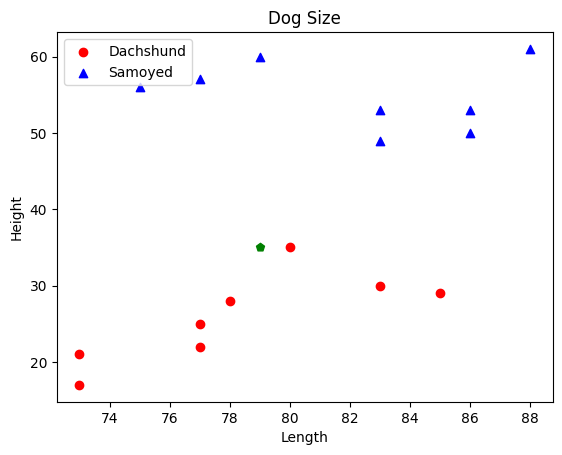

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#닥스훈트
dach_length = [77,78,85,83,73,77,73,80]
dach_height = [25,28,29,30,21,22,17,35]
#사모에드
samo_length = [75,77,86,86,79,83,83,88]
samo_height = [56,57,50,53,60,53,49,61]

plt.scatter(dach_length, dach_height, c = 'red', label = 'Dachshund')
plt.scatter(samo_length, samo_height, c = 'blue', marker = '^', label = 'Samoyed')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog Size')
plt.legend(loc = 'upper left')

#새 데이터 추가
newdata_length = [79]
newdata_heigth = [35]

plt.scatter(newdata_length, newdata_heigth, c = 'green', marker = 'p', label = 'New Data')

plt.show()

In [ ]:
#데이터와 레이블 구성
d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) #닥스훈트는 0으로 레이블링

s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data)) #사모예드는 1으로 레이블링

newdata = [[79,35]]

In [ ]:
#K-NN 학습-예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

dogs = np.concatenate((d_data, s_data))
labels = np.concatenate((d_label, s_label))

dog_classes = {0:"Dachshund", 1 : 'Samoyed'}

k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)

print('데이터 :', newdata, ',판정결과 :', dog_classes[y_pred[0]])

데이터 : [[79, 35]] ,판정결과 : Dachshund


도전문제

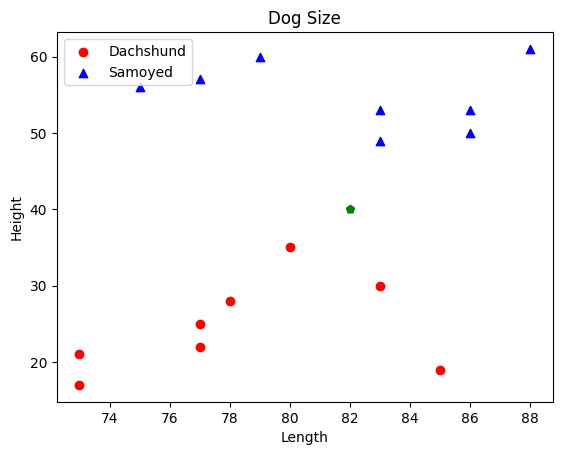

k : 1 일떄 판정 결과 : Dachshund
k : 5 일떄 판정 결과 : Dachshund
k : 9 일떄 판정 결과 : Samoyed


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#닥스훈트
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 19, 30, 21, 22, 17, 35]

#사모에드
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

plt.scatter(dach_length, dach_height, c = 'red', label = 'Dachshund')
plt.scatter(samo_length, samo_height, c = 'blue', marker = '^', label = 'Samoyed')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog Size')
plt.legend(loc = 'upper left')

#데이터와 레이블 구성
d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) #닥스훈트는 0으로 레이블링

s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data)) #사모예드는 1으로 레이블링

#새 데이터 추가
newdata_length = [82]
newdata_heigth = [40]

plt.scatter(newdata_length, newdata_heigth, c = 'green', marker = 'p', label = 'New Data')

plt.show()

newdata = [[82,40]]

dogs = np.concatenate((d_data, s_data))
labels = np.concatenate((d_label, s_label))

dog_classes = {0:"Dachshund", 1:'Samoyed'}

def knn_an(n):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(dogs, labels)
    y_pred = knn.predict(newdata)
    print('k :', n, '일떄 판정 결과 :', dog_classes[y_pred[0]])


knn_an(1)
knn_an(5)
knn_an(9)



## knn 붓꽃

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:5] # 꽃받침 길이, 너비, 꽃잎 길이, 너비 / 종류 : Versicolor, Serosa, Virginica

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
print('iris 데이터 형태',iris.data.shape)
print('iris 데이터 속성들',iris.feature_names)
print('iris 데이터 레이블',iris.target)

iris 데이터 형태 (150, 4)
iris 데이터 속성들 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris 데이터 레이블 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()
"""
iris_df['target'].value_counts()
iris_df.values
"""

"\niris_df['target'].value_counts()\niris_df.values\n"

In [ ]:
x = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def iris_knn(x, y, k):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  return metrics.accuracy_score(y_test, y_pred)

k = 3
scores = iris_knn(x,y,k)
print('n_neighbors가 {0:d} 일때 정확도: {1:.3f}'.format(k, scores) )

n_neighbors가 3 일때 정확도: 0.978


도전문제

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:5]

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

x = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def iris_knn(x, y, k):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  scores = metrics.accuracy_score(y_test, y_pred)
  return print('n_neighbors가 {0:d} 일때 정확도: {1:.3f}'.format(k, scores))


iris_knn(x,y,1)
iris_knn(x,y,5)
iris_knn(x,y,10)
iris_knn(x,y,20)
iris_knn(x,y,30)


n_neighbors가 1 일때 정확도: 0.933
n_neighbors가 5 일때 정확도: 0.978
n_neighbors가 10 일때 정확도: 0.956
n_neighbors가 20 일때 정확도: 0.933
n_neighbors가 30 일때 정확도: 0.889


## 새로운 꽃에 대해서 학습

knn 학습

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

새로운 데이터로 예측

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

x = [[4,2,1.3,0.4],
     [4,3,3.2,2.2]]
y = knn.predict(x)

print('{} 특성을 가지는 품종: {}'.format(x[0], classes[y[0]]))
print('{} 특성을 가지는 품종: {}'.format(x[1], classes[y[1]]))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor


전체데이터에 대한 예측 정확도

In [ ]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print("n_neighbor가 {0:d}일때 정확도 : {1:.3f}".format(k,scores))

n_neighbor가 3일때 정확도 : 0.960


2차원 히스토그램으로 예측결과 시각화

(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7d24aa7a9ac0>)

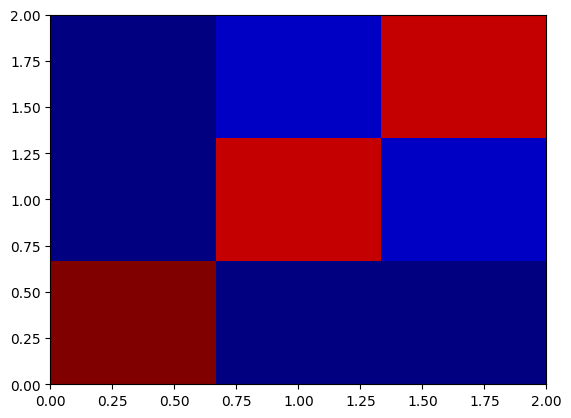

In [ ]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins = (3,3), cmap = plt.cm.jet)
# plt.hist2d(iris.target, y_pred_all, bins = (3,3), cmap = plt.cm.grey)

혼동행렬

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(iris.target, y_pred_all)
print(conf_mat)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


## 사이킷런의 성능

In [ ]:
target = np.array([0] * 10 + [1] * 10)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
pred = np.array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, pred)

array([[7, 3],
       [2, 8]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print('정밀도',precision_score(target,pred))
print('재현율',recall_score(target,pred))
print('정확도',accuracy_score(target,pred))
print('F1스코어',f1_score(target,pred))

정밀도 0.7272727272727273
재현율 0.8
정확도 0.75
F1스코어 0.7619047619047619


도전문제

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np

total = 10000
samoyed_true = 9900
dachshund_true = 100

def classifier_A(length, height):
  return 'Samoyed'

y_true = ['Samoyed'] * samoyed_true + ['Dachshund'] * dachshund_true
y_pred = ['Samoyed'] * total

precision = precision_score(y_true, y_pred, pos_label='Samoyed')
recall = recall_score(y_true, y_pred, pos_label='Samoyed')
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, pos_label='Samoyed')

print("정밀도 : {}".format(precision))
print("재현률 : {}".format(recall))
print("정확도 : {}".format(accuracy))
print("F1-score : {}".format(f1))


정밀도 : 0.99
재현률 : 1.0
정확도 : 0.99
F1-score : 0.9949748743718593


## 군집합

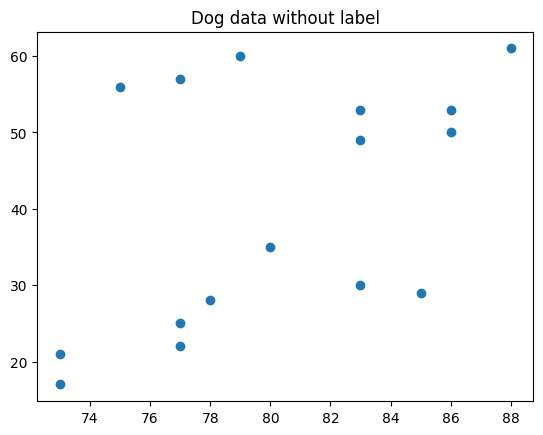

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#닥스훈트
dach_length = [77,78,85,83,73,77,73,80]
dach_height = [25,28,29,30,21,22,17,35]
#사모에드
samo_length = [75,77,86,86,79,83,83,88]
samo_height = [56,57,50,53,60,53,49,61]

dog_length = np.array(dach_length + samo_length)
dog_height = np.array(dach_height + samo_height)

dog_data = np.column_stack((dog_length, dog_height))

plt.title("Dog data without label")
plt.scatter(dog_length, dog_height)

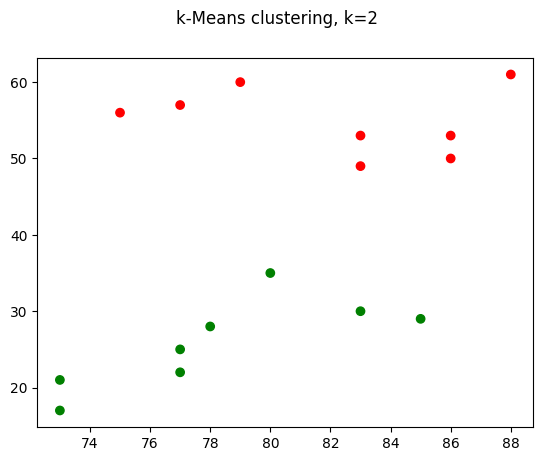

In [ ]:
from sklearn import cluster

def kmeans_predict_plot(x, k):
  model = cluster.KMeans(n_clusters=k)
  model.fit(x)
  labels = model.predict(x)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle("k-Means clustering, k={}".format(k))
  plt.scatter(x[:, 0],x[:, 1], color=colors[labels])

kmeans_predict_plot(dog_data, k = 2)


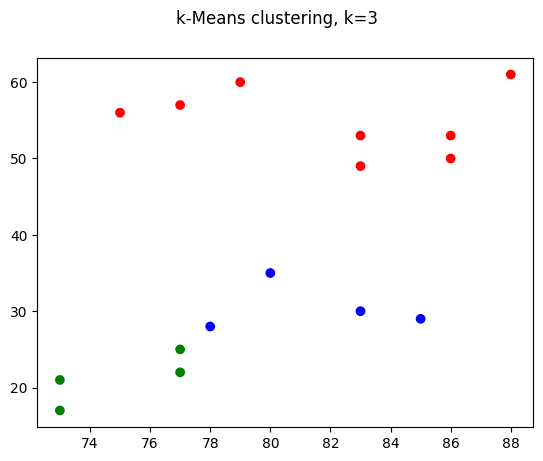

In [ ]:
kmeans_predict_plot(dog_data, k = 3)


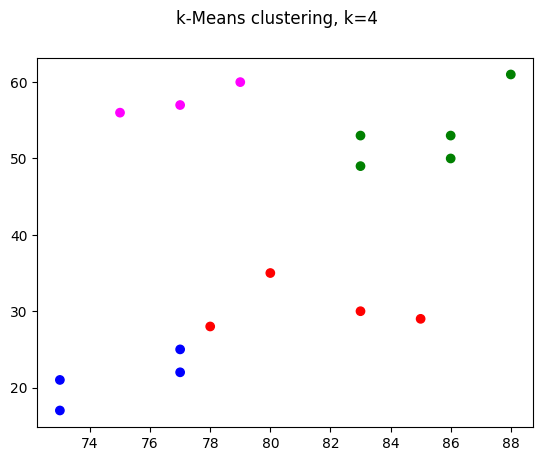

In [ ]:
kmeans_predict_plot(dog_data, k = 4)

### 실습

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score

# iris 데이터 로드
iris = load_iris()
X = iris.data
true_labels = iris.target

# KMeans 군집화 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.labels_
print("군집화 결과 lables =", cluster_labels)

# 군집화 결과 레이블과 실제 레이블 매칭 (레이블 재배열)
new_label = np.zeros_like(cluster_labels)

# 클러스터별 가장 많이 속한 실제 레이블로 재매핑
for i in range(3):
    mask = (cluster_labels == i)
    if np.sum(mask) == 0:
        continue
    most_common = np.bincount(true_labels[mask]).argmax()
    new_label[mask] = most_common

print("다시 레이블링을 한 후의 new_lable =",new_label)

# 정확도 계산
accuracy = accuracy_score(true_labels, new_label)
print("iris 데이터릐 군집화 정확도: ", accuracy)




군집화 결과 lables = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
다시 레이블링을 한 후의 new_lable = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
iris 데이터릐 군집화 정확도:  0.8866666666666667
